# Text generation test using dilated convolutional networks

In [1]:
%matplotlib inline

## Global config

Name of corpus file (without txt extension)

In [2]:
corpusname = "toyseries"

Number of past input tokens to use for generation

In [3]:
inputtokens = 128

Network architecture to use

In [4]:
architecture = "wavenet"

### Process config

Get all relevant file names

In [5]:
corpusfile = 'corpus/' + corpusname + '.txt'
encodername = corpusname + '.enc'
modelname = corpusname + '.h5'

Obtain model class

In [6]:
from neurowriter.models import modelbyname
modelclass = modelbyname(architecture)

Using TensorFlow backend.


## Load corpus

In [7]:
with open(corpusfile) as f:
    corpus = f.read()

In [8]:
corpus[0:min(1000,len(corpus))]

'AAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAA

## Encoding

In [9]:
from neurowriter.encoding import Encoder, loadencoding
try:
    encoder = loadencoding(encodername)
    print("Loaded encoder", encodername)
except Exception as e:
    print("Encoder not found, creating new encoder:", e)
    encoder = Encoder(corpus)
    encoder.save(encodername)

Loaded encoder toyseries.enc


## Model training

Params: [16, 4, 0.60276337607164387, 'rmsprop'] , loss:  0.110360052437
Params: [16, 4, 0.43758721126269251, 'adam'] , loss:  0.137304740027
Params: [64, 2, 0.79172503808266459, 'rmsprop'] , loss:  0.119559027255
Params: [16, 5, 0.071036058197886942, 'sgd'] , loss:  0.933494329453
Params: [4, 5, 0.77815675094985048, 'adam'] , loss:  0.393047437072
Params: [64, 4, 0.46147936225293185, 'adam'] , loss:  0.132431555539
Params: [4, 4, 0.1433532874090464, 'adam'] , loss:  0.186665534973
Params: [16, 3, 0.26455561210462697, 'adam'] , loss:  0.11532882601
Params: [16, 3, 0.018789800436355142, 'rmsprop'] , loss:  0.114769652486
Params: [32, 4, 0.94374807851462417, 'adam'] , loss:  0.195515457541
Params: [4, 3, 0.62705474244735326, 'sgd'] , loss:  0.327638313174
Params: [16, 1, 0.10238018672952998, 'rmsprop'] , loss:  0.134279228747
Params: [16, 4, 0.040324385264373874, 'sgd'] , loss:  0.94091412425
Params: [4, 1, 0.0051834445665320805, 'sgd'] , loss:  0.309944465756
Params: [16, 4, 0.0465576163

OSError: Unable to create file (Unable to open file: name = 'toyseries.h5', errno = 13, error message = 'permission denied', flags = 13, o_flags = 242)

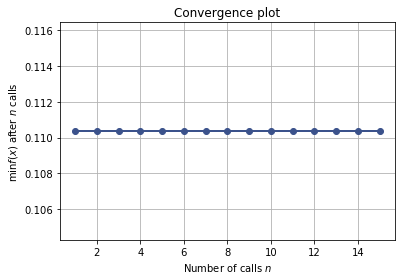

In [10]:
from neurowriter.optimizer import hypertrain

model, train_history = hypertrain(modelclass, inputtokens, encoder, corpus, n_calls=15)
model.save(modelname)

## Generation test

In [11]:
from neurowriter.writer import Writer

writer = Writer(model, encoder, creativity=0.1)
print(corpus[:inputtokens])
''.join(writer.write(seed=corpus[:inputtokens]))

AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AABBAABBAB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
ABABABA


'BAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB

### Manual test generation test with 0 creativity

In [12]:
import numpy as np
seed = corpus[:inputtokens]
print("Seed:", seed)
print("Generated")
print(seed, end='')
for i in range(1000):
    seedcoded = encoder.encodetext(seed)
    #cls = model.predict_classes(np.array([seedcoded]), verbose=0)
    #char = encoder.index2char[cls[0]]
    cls = np.argmax(model.predict(np.array([seedcoded])))
    char = encoder.index2char[cls]
    print(char, end='')
    seed = seed[1:] + char

Seed: AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AABBAABBAB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
ABABABA
Generated
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AABBAABBAB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
ABABABABAB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBB

## Possible improvements

* Try training with SGD and the full pecera corpus for a large number of iterations

From Facebook's convolutional translation paper
* Tokens are dealt with embeddings instead of one-hot encoder.
* The position of each token is also added as a parallel embedding
* Dropout for the embeddings and for the input of each convolutional block

## References

* WaveNet paper: https://arxiv.org/pdf/1609.03499.pdf
* A Keras implementation of WaveNet: https://github.com/usernaamee/keras-wavenet/blob/master/simple-generative-model.py
* Another one: https://github.com/basveeling/wavenet/blob/master/wavenet.py
* Facebook's convolutional translation paper: https://arxiv.org/pdf/1705.03122.pdf

## Scrapyard

def sampletext(logs):
    """Function that generates some sample text with the model.

    Intented to be used as a keras callback
    """
    writer = Writer(model, encoder, creativity=0.1)
    print(corpus[:inputtokens])
    print(''.join(writer.write(seed=corpus[:inputtokens])))

# Build model with input parameters
model = modelkind(inputtokens, encoder, *bestparams)
# Prepare callbacks
callbacks = [
    LambdaCallback(on_train_end=sampletext),
    ModelCheckpoint(filepath=modelname,save_best_only=True),
    EarlyStopping(patience=patience)
]
# Train model
model.fit_generator(
    traingenerator,
    steps_per_epoch=int((1-val)*(len(corpus)-inputtokens+1)/batchsize),
    validation_data=valgenerator,
    validation_steps=int(val*(len(corpus)-inputtokens+1)/batchsize),
    epochs=maxepochs,
    verbose=2,
    callbacks=callbacks
)